In [1]:
from DecisionTreeClassifier import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

In [2]:
dataSet = "data_banknote_authentication.txt"

#### Data Description
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

#### Variables
- Variance of Wavelet Transformed image (continuous)
- Skewness of Wavelet Transformed image (continuous)
- Curtosis of Wavelet Transformed image (continuous)
- Entropy of image (continuous)
- Class (integer, 0 = real, 1 = fake)

In [3]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(listFromLine[index_y])
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

In [4]:
## confusion matrix plot
def plot_cm(y, y_est):
    cm = confusion_matrix(y, y_est);
    accuracy = np.round(100*cm.diagonal().sum()/cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    #plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

In [5]:
colName, X, classLabelVector = file2matrix(dataSet, header = False, delimeter=",", index_y =-1)
featureName = ["Variance", "Skewness", "Curtosis", "Entropy"]
y = np.array([int(val) for val in classLabelVector])
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

(1372, 4)


In [6]:
model = DecisionTreeClassifier()
pprint(model.tree(X_train,y_train,featureName))

{'col': 'Variance',
 'cut_off': 0.3223,
 'index_col': 0,
 'left': {'col': 'Skewness',
          'cut_off': 7.6274,
          'index_col': 1,
          'left': {'col': 'Variance',
                   'cut_off': -0.39816,
                   'index_col': 0,
                   'left': {'col': 'Curtosis',
                            'cut_off': 6.8681,
                            'index_col': 2,
                            'left': {'col': 'Skewness',
                                     'cut_off': 7.3273,
                                     'index_col': 1,
                                     'left': {'val': 1.0},
                                     'right': {'col': 'Variance',
                                               'cut_off': -0.53966,
                                               'index_col': 0,
                                               'left': {'val': 1.0},
                                               'right': {'val': 0.0},
                                               '

1.0


array([[244,   9],
       [  0, 200]], dtype=int64)

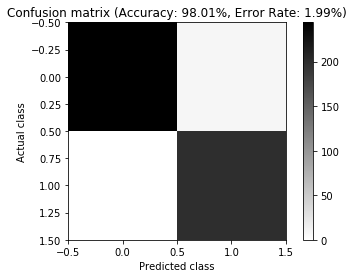

In [7]:
model.fit(X_train,y_train)
print(model.score())
pred = model.prediction(X_test)
plot_cm(y_test,pred)
confusion_matrix(y_test, pred)